# Machine learning to predict molecule properties : solubility



The solubility of molecules is an important property in many applications like for drug selection or for compound selection for battery designes (no link to health).

Being able to predict the solubility of a molecule from its formula instead of having to make measuring experiment in an important aspect to enhanced fatester molecule discovery.

In this notebook we will do basic solubility prediction with machine learning models and rdkit


Install the python rdkit package with pip or conda

cf https://www.rdkit.org/docs/index.html

In [4]:
!pip install numpy

In [3]:
!pip install rdkit-pypi

     |████████████████████████████████| 22.5 MB 1.1 MB/s 


# Molecule representations with Rdkit

Rdkit is a package allowing to work with molecule data and their representation. 

For basic manipulations, the main submodule is **Chem**



### Smile representation

Smile lets represent molecules with text strings




The following string contains the SMILE representation of the paracetamol molecule

In [14]:
smile = 'CC(=O)NC1=CC=C(O)C=C1'

import rdkit and the Chem submodule

In [24]:
import rdkit
from rdkit import Chem

Using the MolFromSmiles function, create a molecule from the smile representation and print its types

In [26]:
mol = Chem.MolFromSmiles(smile)

print(type(mol))
print(mol)
mol

<class 'rdkit.Chem.rdchem.Mol'>


With the MolToImage function of the Draw package, display the molecule

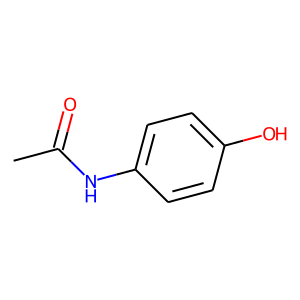

In [27]:
Chem.Draw.MolToImage(mol)

You can get the Number of atoms of the molecules and the list of atoms with the methods GetNumAtoms and getAtoms.

Print the number of atoms of the molecule

In [29]:
print("Number of atoms is : ", mol.GetNumAtoms())

print("List of atom : ", mol.GetAtoms())

Number of atoms is :  11
List of atom :  <rdkit.Chem.rdchem._ROAtomSeq object at 0x7eff378e9490>


If you compare to the picture, you may see that the number of atoms is not 11. What is the total number and why rdkit do not give the same answer ?

Our real molecule has 18 atoms, but we have only 11 atoms in the representation, this is because our molecule is represented without the hydrogen atoms, as we know that they will be placed there in addition to the number of bonds needed for each atom we do not need to make them visible.

Print the list of each atoms

In [30]:
list_atom = []
for atom in mol.GetAtoms():
    list_atom.append(atom.GetSymbol())

print("The list of atom is the following : ", list_atom)

The list of atom is the following :  ['C', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'C']


Store the number of bonds of the molecule in **n_bond** (look which method can be used for that) and print

In [36]:
n_bond = mol.GetNumBonds()
print("So we have n_bound : ", n_bond)

So we have n_bound :  11


For each bond, print if the bond is single or double

In [32]:
for bond in mol.GetBonds():
    print(str(bond.GetBondType()))

SINGLE
DOUBLE
SINGLE
SINGLE
AROMATIC
AROMATIC
AROMATIC
SINGLE
AROMATIC
AROMATIC
AROMATIC


### Reading molecule data from file

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at 
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf". 


Download this file and save it in a folder. 




Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier" and store the result in a variable named **morphine**



In [33]:
!wget https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf

--2022-04-02 14:48:44--  https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf
Resolving go.drugbank.com (go.drugbank.com)... 172.66.41.6, 172.66.42.250, 2606:4700:3108::ac42:2afa, ...
Connecting to go.drugbank.com (go.drugbank.com)|172.66.41.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘DB00295.sdf’

DB00295.sdf             [ <=>                ]   7.48K  --.-KB/s    in 0s      

2022-04-02 14:48:45 (68.9 MB/s) - ‘DB00295.sdf’ saved [7662]



In [34]:
!ls

DB00295.sdf  sample_data


In [35]:
suppl = Chem.SDMolSupplier('DB00295.sdf')
morphine = suppl
print(morphine)

Display its type

In [37]:
print(type(morphine))

<class 'rdkit.Chem.rdmolfiles.SDMolSupplier'>


Display the picture of the molecule


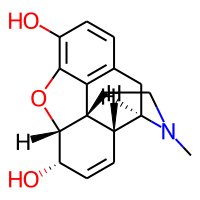

In [38]:
Chem.Draw.MolsToImage(morphine)

Display the number of atoms and the number of bonds

In [41]:
print("Number of atom : ", morphine[0].GetNumAtoms())
print("Number of bounds  ", len(morphine[0].GetBonds()))

Number of atom :  21
Number of bounds   25


### Descriptors 


Molecules are also described by a set of physiochemical descriptors like 
- the log partition coefficient,
- the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.

The rdkit.ML.Descriptors module and its sub module let us compute molecule descriptors.

the rdkit.ML.Descriptors module has an attribute name \_descList, display it

In [44]:
from rdkit.Chem import Descriptors

print(Descriptors._descList)
print("\n\n\n")
Descriptors._descList

[('MaxEStateIndex', <function MaxEStateIndex at 0x7eff37894830>), ('MinEStateIndex', <function MinEStateIndex at 0x7eff37894e60>), ('MaxAbsEStateIndex', <function MaxAbsEStateIndex at 0x7eff378aa290>), ('MinAbsEStateIndex', <function MinAbsEStateIndex at 0x7eff378aa4d0>), ('qed', <function qed at 0x7eff378cb5f0>), ('MolWt', <function <lambda> at 0x7eff3789d0e0>), ('HeavyAtomMolWt', <function HeavyAtomMolWt at 0x7eff3789d170>), ('ExactMolWt', <function <lambda> at 0x7eff378cb8c0>), ('NumValenceElectrons', <function NumValenceElectrons at 0x7eff378cb950>), ('NumRadicalElectrons', <function NumRadicalElectrons at 0x7eff378cb9e0>), ('MaxPartialCharge', <function MaxPartialCharge at 0x7eff378cbb00>), ('MinPartialCharge', <function MinPartialCharge at 0x7eff378cbb90>), ('MaxAbsPartialCharge', <function MaxAbsPartialCharge at 0x7eff378cbc20>), ('MinAbsPartialCharge', <function MinAbsPartialCharge at 0x7eff378cbcb0>), ('FpDensityMorgan1', <function FpDensityMorgan1 at 0x7eff378cbdd0>), ('FpDen

[('MaxEStateIndex', <function rdkit.Chem.EState.EState.MaxEStateIndex>),
 ('MinEStateIndex', <function rdkit.Chem.EState.EState.MinEStateIndex>),
 ('MaxAbsEStateIndex', <function rdkit.Chem.EState.EState.MaxAbsEStateIndex>),
 ('MinAbsEStateIndex', <function rdkit.Chem.EState.EState.MinAbsEStateIndex>),
 ('qed', <function rdkit.Chem.QED.qed>),
 ('MolWt', <function rdkit.Chem.Descriptors.<lambda>>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.HeavyAtomMolWt>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons>),
 ('MaxPartialCharge', <function rdkit.Chem.Descriptors.MaxPartialCharge>),
 ('MinPartialCharge', <function rdkit.Chem.Descriptors.MinPartialCharge>),
 ('MaxAbsPartialCharge',
  <function rdkit.Chem.Descriptors.MaxAbsPartialCharge>),
 ('MinAbsPartialCharge',
  <function rdkit.Chem.Descriptors.MinAbsPa

Compute all descriptors in the _descList list of the paracetamol molecule using the MoleculeDescriptors.MolecularDescriptorCalculator class

In [45]:
all_descriptors = [ desc[0] for desc in Descriptors._descList]

In [60]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

calculator = MolecularDescriptorCalculator(all_descriptors)
calc = calculator.CalcDescriptors(morphine[0])

Display the names and the fvalues of the descriptors

In [61]:
for i in range(len(all_descriptors)):
    print(all_descriptors[i], end=": ")
    print(calc[i])

MaxEStateIndex: 10.440693027210884
MinEStateIndex: -0.5943924792139084
MaxAbsEStateIndex: 10.440693027210884
MinAbsEStateIndex: 0.1597222222222221
qed: 0.7033474919154648
MolWt: 285.34299999999996
HeavyAtomMolWt: 266.191
ExactMolWt: 285.136493468
NumValenceElectrons: 110
NumRadicalElectrons: 0
MaxPartialCharge: 0.1652428909596224
MinPartialCharge: -0.5042466595879944
MaxAbsPartialCharge: 0.5042466595879944
MinAbsPartialCharge: 0.1652428909596224
FpDensityMorgan1: 1.3333333333333333
FpDensityMorgan2: 2.1904761904761907
FpDensityMorgan3: 3.0476190476190474
BCUT2D_MWHI: 16.516853102099954
BCUT2D_MWLOW: 9.53113651260579
BCUT2D_CHGHI: 2.636111461135519
BCUT2D_CHGLO: -2.5601210424889
BCUT2D_LOGPHI: 2.617132894412904
BCUT2D_LOGPLOW: -2.6431440356017544
BCUT2D_MRHI: 5.612054247185539
BCUT2D_MRLOW: -0.04529371357624026
BalabanJ: 1.8445254467475667
BertzCT: 670.2442212037415
Chi0: 14.353006672199017
Chi0n: 11.990011574040388
Chi0v: 11.990011574040388
Chi1: 10.125864216121357
Chi1n: 7.71332795441

### Fingerprinting


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.




In [62]:
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect


With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector. 

In [65]:
fp_paracetamol = GetMorganFingerprintAsBitVect(morphine[0], 2)

Display its type

In [66]:
print("We have the following type : ", type(fp_paracetamol))

We have the following type :  <class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>


With the DataStructs module convert it to a numpy vector and display it shape and display it

In [70]:
import numpy
from rdkit import DataStructs

vector_paracetamol = numpy.array(fp_paracetamol)
print(vector_paracetamol)

[0 0 0 ... 0 0 0]


Create a function smiles_to_np_morganfingerprinting which takes a smile representation and gives back the numpy version of the morgan finger_printing

In [71]:
def smiles_to_np_morganfinderprinting(smile_mol):

    real_mol = Chem.MolFromSmiles(smile_mol)
    fp_mol = GetMorganFingerprintAsBitVect(real_mol, 2)
    vector_mol = numpy.array(fp_mol)
    return vector_mol

Compute the morgan finger printing of the aspirin (CC(=O)OC1=CC=CC=C1C(O)=O) and paracetamol (CC(=O)NC1=CC=C(O)C=C1)

In [73]:
fp_aspirin = smiles_to_np_morganfinderprinting("CC(=O)OC1=CC=CC=C1C(O)=O")
print(fp_aspirin)

[0 0 0 ... 0 0 0]


In [75]:
fp_paracetamol = smiles_to_np_morganfinderprinting("CC(=O)NC1=CC=C(O)C=C1")
print(fp_paracetamol)

[0 0 0 ... 0 0 0]


Compute the DiceSimilarity of the two molecules

In [80]:
def smiles_to_fp(smile_mol):

    real_mol = Chem.MolFromSmiles(smile_mol)
    fp_mol = GetMorganFingerprintAsBitVect(real_mol, 2)

    return fp_mol

In [81]:
fp_aspirin = smiles_to_fp("CC(=O)OC1=CC=CC=C1C(O)=O")
print(fp_aspirin)

fp_paracetamol = smiles_to_fp("CC(=O)NC1=CC=C(O)C=C1")
print(fp_paracetamol)

In [84]:
print("We have the following dicesimilarity : ", rdkit.DataStructs.DiceSimilarity(fp_aspirin, fp_paracetamol))

We have the following dicesimilarity :  0.36363636363636365


### SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.



Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).




Highlight the pattern "CCC" in these molecules.




Do the same thing ex 1 but for the pattern "C(=O)N".